<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-4-yiheng/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [ ]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pulsedb-balanced-training-and-testing' dataset.
Path to dataset files: /kaggle/input/pulsedb-balanced-training-and-testing


In [ ]:
# run this block to move the data to a permanent directory in your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# run this block after data is saved to your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
print(f"Found {len(mat_files)} .mat files")
for f in mat_files:
    print(" -", f)

Mounted at /content/drive
Found 5 .mat files
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalFree_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat


Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [1]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

# !cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:].astype('float32')
    PPG = data_dict['Signals'][:,1,:].astype('float32')
    ABP = data_dict['Signals'][:,2,:].astype('float32')
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

Mounted at /content/drive
finished loading/content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
constructed df
finished loading/content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat
constructed df


In [ ]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [ ]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

,count
Subject,
p006090_1,40
p000001_1,40
p000003_1,40
p000005_1,40
p000012_1,40
...,...
p000063_1,40
p000064_1,40
p000074_1,40


In [ ]:
# summary statistics
print(df_Train.keys())
print(df_Train.info())
print(df_Train.describe())
df_Train

# missing data
print("missing data:")
features = ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'SBP', 'DBP']
for feature in features:
    print(feature, df_Train[feature].isna().sum())

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465480 entries, 0 to 465479
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Age      465480 non-null  float64
 1   BMI      465480 non-null  float64
 2   DBP      465480 non-null  float64
 3   Gender   465480 non-null  int64  
 4   Height   465480 non-null  float64
 5   SBP      465480 non-null  float64
 6   Subject  465480 non-null  object 
 7   Weight   465480 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 28.4+ MB
None
                 Age            BMI            DBP         Gender  \
count  465480.000000  465480.000000  465480.000000  465480.000000   
mean       58.980983      22.918767      62.915730       0.576953   
std        15.032404       3.437773      12.084088       0.494043   
min         0.400000      12.400000      16.226861       0.0000

In [ ]:
df_Train['Subject'].value_counts()

,count
Subject,
p006090_1,360
p000001_1,360
p000003_1,360
p000005_1,360
p000012_1,360
...,...
p000063_1,360
p000064_1,360
p000074_1,360


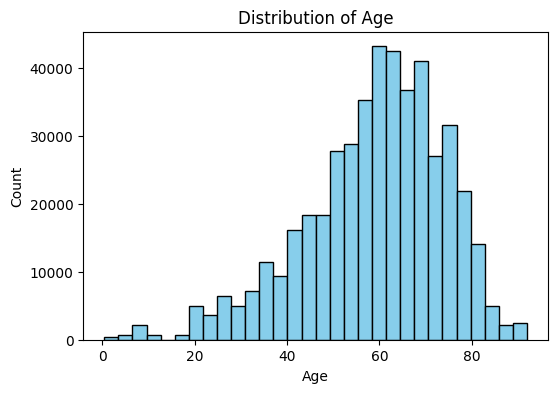

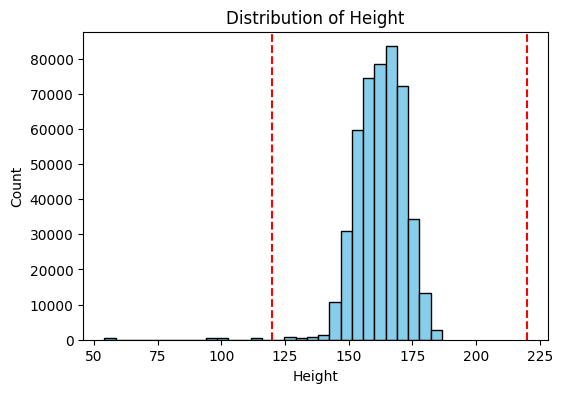

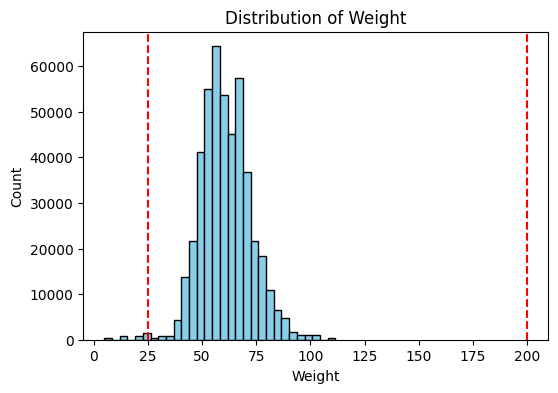

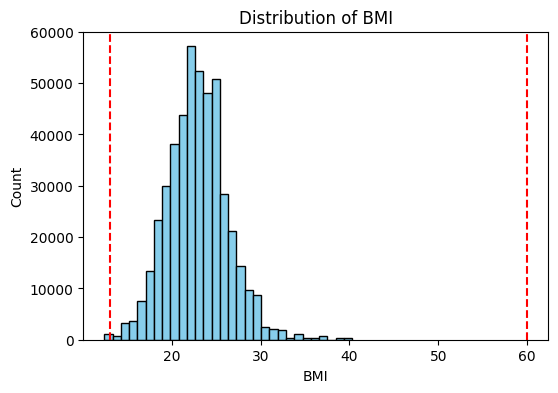

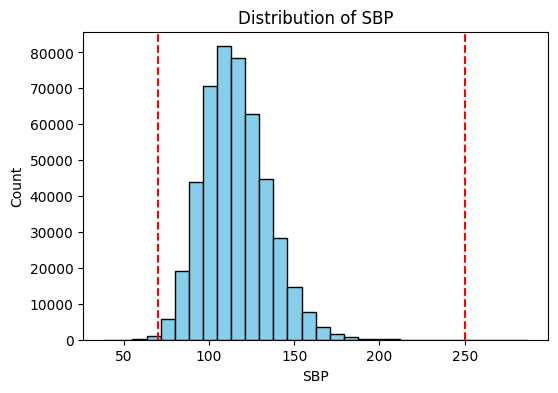

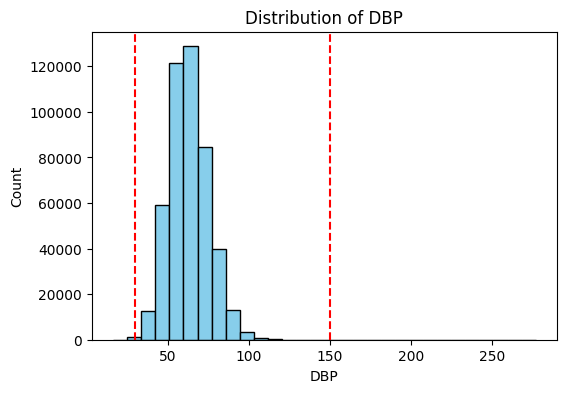

In [ ]:
import matplotlib.pyplot as plt

features = ['Age', 'Height', 'Weight', 'BMI', 'SBP', 'DBP']
ranges = {
    'Height': (120, 220),
    'Weight': (25, 200),
    'BMI': (13, 60),
    'SBP': (70, 250),
    'DBP': (30, 150)
}

for f in features:
    plt.figure(figsize=(6,4))
    plt.hist(df_Train[f], bins=30, color='skyblue', edgecolor='black')
    if f in ranges:
      plt.axvline(ranges[f][0], color='red', linestyle='--')
      plt.axvline(ranges[f][1], color='red', linestyle='--')
    plt.title(f'Distribution of {f}')
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# correlation
print("correlation between SBP and DBP = ", df_Train['SBP'].corr(df_Train['DBP']))
import pandas as pd

features = ['Age', 'Height', 'Weight', 'BMI']
targets = ['SBP', 'DBP']

corr_df = pd.DataFrame(index=features, columns=targets)
for feature in features:
    for target in targets:
        corr_df.loc[feature, target] = df_Train[feature].corr(df_Train[target])

corr_df = corr_df.astype(float).round(2)
corr_df

correlation between SBP and DBP =  0.746371978599585


,SBP,DBP
Age,0.08,-0.13
Height,0.04,0.09
Weight,0.05,0.10
BMI,0.05,0.07


In [ ]:
df_Train_M = df_Train[df_Train['Gender'] == 1]
df_Train_F = df_Train[df_Train['Gender'] == 0]

print("Male:")
print(df_Train_M.info())
print(df_Train_M.describe())

print("Female:")
print(df_Train_F.info())
print(df_Train_F.describe())

Male:
<class 'pandas.core.frame.DataFrame'>
Index: 268560 entries, 0 to 465479
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Age      268560 non-null  float64
 1   BMI      268560 non-null  float64
 2   DBP      268560 non-null  float64
 3   Gender   268560 non-null  int64  
 4   Height   268560 non-null  float64
 5   SBP      268560 non-null  float64
 6   Subject  268560 non-null  object 
 7   Weight   268560 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.4+ MB
None
                 Age            BMI            DBP    Gender         Height  \
count  268560.000000  268560.000000  268560.000000  268560.0  268560.000000   
mean       60.398079      22.925959      62.893961       1.0     167.663943   
std        14.309912       3.123985      11.854259       0.0       7.409583   
min         5.000000      12.400000      16.775843       1.0      97.000000   
25%        53.000000      20.800000 

In [2]:
mask = (
    (df_Train["Height"].between(120, 220)) &
    (df_Train["Weight"].between(25, 200)) &
    (df_Train["BMI"].between(13, 60)) &
    (df_Train["SBP"].between(70, 250)) &
    (df_Train["DBP"].between(30, 150))
)

df_Train = df_Train.loc[mask]

In [ ]:
df_Train['Subject'].value_counts()

,count
Subject,
p006090_1,360
p000001_1,360
p000003_1,360
p000005_1,360
p000012_1,360
...,...
p002621_1,329
p000510_1,325
p003112_1,304


In [3]:
keep_idx = df_Train.index.to_numpy()

ECG_Train = ECG_Train[keep_idx]
PPG_Train = PPG_Train[keep_idx]
ABP_Train = ABP_Train[keep_idx]

print(ABP_Train.shape)
print(ECG_Train.shape)
print(PPG_Train.shape)

(461429, 1250)
(461429, 1250)
(461429, 1250)


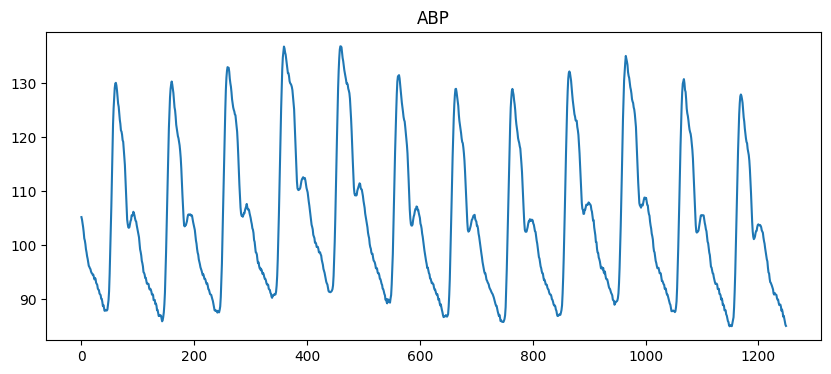

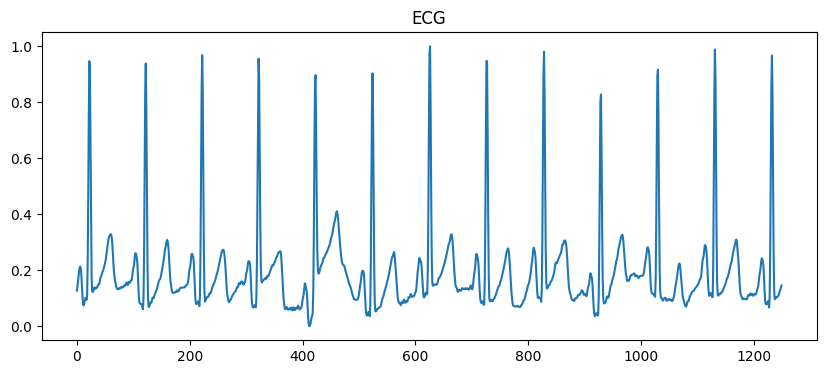

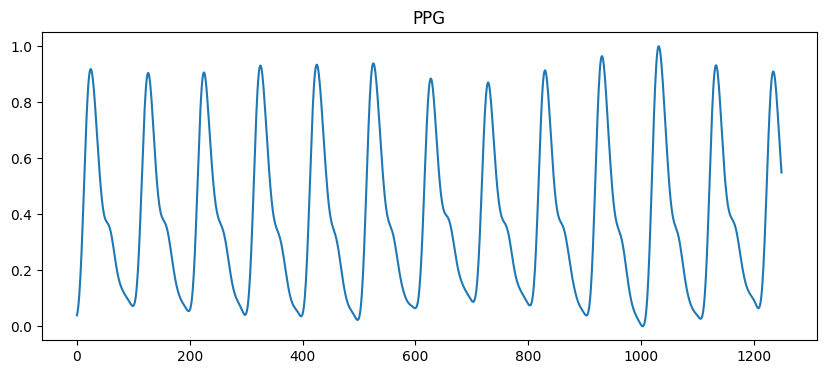

In [ ]:
# samples of ABP, ECG, and PPG signals
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(ABP_Train[0])
plt.title('ABP')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(ECG_Train[0])
plt.title('ECG')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(PPG_Train[0])
plt.title('PPG')
plt.show()

In [ ]:
# correlation
print("correlation between SBP and DBP = ", df_Train['SBP'].corr(df_Train['DBP']))
import pandas as pd

features = ['Age', 'Height', 'Weight', 'BMI']
targets = ['SBP', 'DBP']

corr_df = pd.DataFrame(index=features, columns=targets)
for feature in features:
    for target in targets:
        corr_df.loc[feature, target] = df_Train[feature].corr(df_Train[target])

corr_df = corr_df.astype(float).round(2)
corr_df

correlation between SBP and DBP =  0.7410472238653135


,SBP,DBP
Age,0.05,-0.17
Height,-0.01,0.05
Weight,0.01,0.07
BMI,0.03,0.05


In [ ]:
df_Train_M = df_Train[df_Train['Gender'] == 1]
df_Train_F = df_Train[df_Train['Gender'] == 0]

print("Male:")
print(df_Train_M.info())
print(df_Train_M.describe())

print("Female:")
print(df_Train_F.info())
print(df_Train_F.describe())

Male:
<class 'pandas.core.frame.DataFrame'>
Index: 266562 entries, 0 to 465479
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Age      266562 non-null  float64
 1   BMI      266562 non-null  float64
 2   DBP      266562 non-null  float64
 3   Gender   266562 non-null  int64  
 4   Height   266562 non-null  float64
 5   SBP      266562 non-null  float64
 6   Subject  266562 non-null  object 
 7   Weight   266562 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.3+ MB
None
                 Age            BMI            DBP    Gender         Height  \
count  266562.000000  266562.000000  266562.000000  266562.0  266562.000000   
mean       60.673243      22.973055      63.026799       1.0     167.937228   
std        13.859035       3.064282      11.705068       0.0       6.261429   
min        11.000000      14.200000      30.003556       1.0     139.700000   
25%        54.000000      20.900000 

#2. Blood Pressure Prediction


In [4]:
import numpy as np
from sklearn.metrics import r2_score
def get_metrics(test, pred):
  ME = np.mean(np.abs(test - pred))
  SDE = np.std(np.abs(test - pred), ddof=1)
  MAE = np.mean(np.abs(test - pred))
  R2 = r2_score(test, pred)
  return ME, SDE, MAE, R2

import matplotlib.pyplot as plt
def plot_true_vs_pred(test, pred, variable_name, name):
  plt.figure(figsize=(6,6), alpha=0.3)
  plt.scatter(test, pred)
  plt.plot([min(test), max(test)], [min(test), max(test)], 'r--')  # y=x line
  plt.xlabel('True')
  plt.ylabel('Predicted')
  plt.title(f"True vs. Predicted {variable_name} ({name})")
  plt.show()

Time taken: 147.7571771144867
  Variable         ME        SDE        MAE        R2
0      SBP  14.373949  11.102133  14.373949  0.071305
1      DBP   9.081520   7.037380   9.081520  0.093986


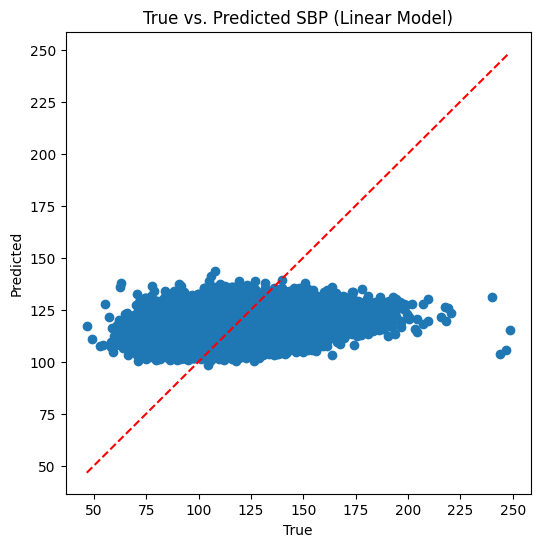

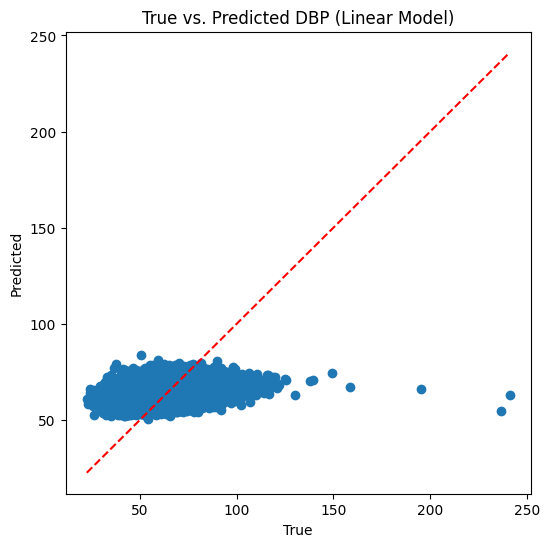

In [5]:
# predict DBP/SBP from ECG and PPG

# baseline linear model
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def linear_model(ECG_train, PPG_train, df_train, ECG_test, PPG_test, df_test):
    start = time.time()
    model_DBP = LinearRegression()
    model_SBP = LinearRegression()
    model_DBP.fit(np.concatenate((ECG_train, PPG_train), axis=1), df_train['DBP'])
    model_SBP.fit(np.concatenate((ECG_train, PPG_train), axis=1), df_train['SBP'])
    end = time.time()
    DBP_pred = model_DBP.predict(np.concatenate((ECG_test, PPG_test), axis=1))
    SBP_pred = model_SBP.predict(np.concatenate((ECG_test, PPG_test), axis=1))

    print("Time taken:", end - start)

    # report the ME, SDE, MAE, and R2.
    DBP_ME, DBP_SDE, DBP_MAE, DBP_R2 = get_metrics(df_test['DBP'], DBP_pred)
    SBP_ME, SBP_SDE, SBP_MAE, SBP_R2 = get_metrics(df_test['SBP'], SBP_pred)

    metrics = {
      'Variable': ['SBP', 'DBP'],
      'ME': [SBP_ME, DBP_ME],
      'SDE': [SBP_SDE, DBP_SDE],
      'MAE': [SBP_MAE, DBP_MAE],
      'R2': [SBP_R2, DBP_R2]
    }

    df_metrics = pd.DataFrame(metrics)
    print(df_metrics)

    # Make plots of the true DBP/SBP vs. estimated DBP/SBP.
    plot_true_vs_pred(df_test['SBP'], SBP_pred, 'SBP', 'Linear Model')
    plot_true_vs_pred(df_test['DBP'], DBP_pred, 'DBP', 'Linear Model')

linear_model(ECG_Train, PPG_Train, df_Train, ECG_CalBased_Test, PPG_CalBased_Test, df_CalBased_Test)

In [6]:
# wrap in PyTorch TensorDatasets and DataLoaders
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd

# ECG_tr, ECG_val, PPG_tr, PPG_val, y_tr, y_val = train_test_split(ECG_Train, PPG_Train, df_Train[['SBP','DBP']], test_size=0.1, random_state=42)
# train-val split

subjects = df_Train['Subject'].unique()

val_indices = []
train_indices = []

for sid in subjects:
    idx = np.where(df_Train['Subject'] == sid)[0]

    n = len(idx)
    val_n = max(0, int(n * 0.1))

    # last 10%
    val_idx = idx[-val_n:]
    # first 90%
    train_idx = idx[:-val_n]

    val_indices.extend(val_idx)
    train_indices.extend(train_idx)

val_indices   = np.array(val_indices)
train_indices = np.array(train_indices)

ECG_tr = ECG_Train[train_indices]
PPG_tr = PPG_Train[train_indices]
df_tr   = df_Train.iloc[train_indices]

ECG_val   = ECG_Train[val_indices]
PPG_val   = PPG_Train[val_indices]
df_val     = df_Train.iloc[val_indices]

ecg_mean = ECG_tr.mean()
ecg_std  = ECG_tr.std()
ppg_mean = PPG_tr.mean()
ppg_std  = PPG_tr.std()

# Normalize ECG
ECG_tr -= ecg_mean
ECG_tr /= ecg_std
ECG_val -= ecg_mean
ECG_val /= ecg_std
ECG_CalBased_Test -= ecg_mean
ECG_CalBased_Test /= ecg_std

# Normalize PPG
PPG_tr -= ppg_mean
PPG_tr /= ppg_std
PPG_val -= ppg_mean
PPG_val /= ppg_std
PPG_CalBased_Test -= ppg_mean
PPG_CalBased_Test /= ppg_std

print("Train samples:", len(train_indices))
print("Validation samples:", len(val_indices))


def BPDataset(ECG, PPG, y, shuffle):
    X = np.stack([ECG, PPG], axis=1)  # (num_samples, 2, seq_len)
    ds = TensorDataset(torch.from_numpy(X.astype(np.float32)), torch.from_numpy(y.values.astype(np.float32)))
    return DataLoader(ds, batch_size=32, shuffle=shuffle)

train_loader = BPDataset(ECG_tr, PPG_tr, df_tr[['SBP','DBP']], shuffle=True)
val_loader   = BPDataset(ECG_val, PPG_val, df_val[['SBP','DBP']], shuffle=False)
test_loader  = BPDataset(ECG_CalBased_Test, PPG_CalBased_Test, df_CalBased_Test[['SBP','DBP']], shuffle=False)

del ECG_Train, PPG_Train, df_Train
del ECG_CalBased_Test, PPG_CalBased_Test
del ECG_tr, PPG_tr, df_tr
del ECG_val, PPG_val, df_val

import gc
gc.collect()
torch.cuda.empty_cache()


Train samples: 415424
Validation samples: 46005


In [7]:
# training function
import time

def evaluate_loop(model, val_loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            val_loss += loss_fn(pred, y).item()
    val_loss /= len(val_loader)
    return val_loss

def train_model(model, train_loader, val_loader, epochs=300, lr=0.001, loss_fn = nn.MSELoss()):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # early stopping setting
    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0
    tol = 0.0001

    n_epochs = epochs
    start = time.time()
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            pred = model(X)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        # validation
        val_loss = evaluate_loop(model, val_loader, loss_fn)

        # early stopping
        if best_val_loss - val_loss >= tol:
          best_val_loss = val_loss
          patience_counter = 0
          torch.save(model.state_dict(), "best_model.pt")
        else:
          patience_counter += 1
          if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pt")
          if patience_counter >= patience:
            n_epochs = epoch+1 - patience
            # print("Early stopping triggered!")
            break
    end = time.time()
    model.load_state_dict(torch.load("best_model.pt"))

    return model, end - start, n_epochs

def predict(model, test_loader):
    model.eval()
    preds = []
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            out = model(X).cpu().numpy()
            preds.append(out)
    return np.vstack(preds)


In [8]:
# models of increasing complexity

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# fully connected NN
class FCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(1250*2, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 2)  # SBP, DBP
        )
    def forward(self, x):
        x = self.flatten(x)
        return self.fc(x)

# 1D CNN
class CNN1D(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch 1 — small receptive field
        self.branch1 = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv1d(32, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # Branch 2 — medium receptive field
        self.branch2 = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.Conv1d(32, 32, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # Branch 3 — large receptive field
        self.branch3 = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=15, padding=7),
            nn.ReLU(),
            nn.Conv1d(32, 32, kernel_size=15, padding=7),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # total output: 32 + 32 + 32 = 96
        self.fc = nn.Sequential(
            nn.Linear(96, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # SBP, DBP
        )

    def forward(self, x):
        b1 = self.branch1(x).squeeze(-1)  # [batch, 32]
        b2 = self.branch2(x).squeeze(-1)  # [batch, 32]
        b3 = self.branch3(x).squeeze(-1)  # [batch, 32]

        x = torch.cat([b1, b2, b3], dim=1)  # [batch, 96]
        return self.fc(x)

# RNN / LSTM / GRU
class RNN(nn.Module):
    def __init__(self, model_type='RNN', hidden_size=64, num_layers=1):
        super().__init__()
        self.model_type = model_type
        if model_type=='RNN':
            self.rnn = nn.RNN(2, hidden_size, num_layers, batch_first=True)
        elif model_type=='LSTM':
            self.rnn = nn.LSTM(2, hidden_size, num_layers, batch_first=True)
        elif model_type=='GRU':
            self.rnn = nn.GRU(2, hidden_size, num_layers, batch_first=True)
        else:
            raise ValueError("model_type must be 'RNN','LSTM', or 'GRU'")
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = x.transpose(1,2)  # (B, seq_len, channels)
        if self.model_type=='LSTM':
            out, (hn, cn) = self.rnn(x)
        else:
            out, hn = self.rnn(x)
        return self.fc(out[:,-1,:])  # use last timestep

# Transformer
class Transformer(nn.Module):
    def __init__(self, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.pos_emb = nn.Parameter(torch.randn(1, 1250, d_model))
        self.input_fc = nn.Linear(2, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 2)
    def forward(self, x):
        x = x.transpose(1,2)          # (B, seq_len, channels)
        x = self.input_fc(x) + self.pos_emb
        x = self.transformer(x)       # [B, seq_len, d_model]
        x = x.mean(dim=1)
        # x = x[-1,:,:]                 # last timestep
        return self.fc(x)

In [9]:
# evaluate models

def evaluate_model(name, model_class, train_loader, val_loader):
  model = model_class()
  if name == "RNN" or name == "LSTM" or name == "GRU":
    trained_model, time, n_epochs = train_model(model, train_loader, val_loader, lr=0.0001)
  else:
    trained_model, time, n_epochs = train_model(model, train_loader, val_loader)
  y_pred = predict(trained_model, test_loader)
  DBP_pred = y_pred[:,0]
  SBP_pred = y_pred[:,1]

  # report the ME, SDE, MAE, and R2.
  DBP_ME, DBP_SDE, DBP_MAE, DBP_R2 = get_metrics(df_CalBased_Test['DBP'], DBP_pred)
  SBP_ME, SBP_SDE, SBP_MAE, SBP_R2 = get_metrics(df_CalBased_Test['SBP'], SBP_pred)

  metrics = pd.DataFrame({
    'Model': [name, name],
    'Variable': ['SBP', 'DBP'],
    'ME': [SBP_ME, DBP_ME],
    'SDE': [SBP_SDE, DBP_SDE],
    'MAE': [SBP_MAE, DBP_MAE],
    'R2': [SBP_R2, DBP_R2],
    'Time': [time, time],
    'Number of epochs': [n_epochs, n_epochs]
  })

  # Make plots of the true DBP/SBP vs. estimated DBP/SBP.
  print(name, ":")
  plot_true_vs_pred(df_CalBased_Test['SBP'], SBP_pred, 'SBP', name)
  plot_true_vs_pred(df_CalBased_Test['DBP'], DBP_pred, 'DBP', name)

  del model
  del trained_model
  torch.cuda.empty_cache()
  gc.collect()

  return metrics
  metrics_list = []

In [ ]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

# !cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:].astype('float32')
    PPG = data_dict['Signals'][:,1,:].astype('float32')
    ABP = data_dict['Signals'][:,2,:].astype('float32')
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

# df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
# df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_AAMI_Cal_Subset.mat')

mask = (
    # (df_Train["Age"].between(55, 65)) &
    (df_Train["Height"].between(120, 220)) &
    (df_Train["Weight"].between(25, 200)) &
    (df_Train["BMI"].between(13, 60)) &
    (df_Train["SBP"].between(70, 250)) &
    (df_Train["DBP"].between(30, 150))
)

df_Train = df_Train.loc[mask]

keep_idx = df_Train.index.to_numpy()

ECG_Train = ECG_Train[keep_idx]
PPG_Train = PPG_Train[keep_idx]
ABP_Train = ABP_Train[keep_idx]

print(ABP_Train.shape)
print(ECG_Train.shape)
print(PPG_Train.shape)

import numpy as np
from sklearn.metrics import r2_score
def get_metrics(test, pred):
  ME = np.mean(np.abs(test - pred))
  SDE = np.std(np.abs(test - pred), ddof=1)
  MAE = np.mean(np.abs(test - pred))
  R2 = r2_score(test, pred)
  return ME, SDE, MAE, R2

import matplotlib.pyplot as plt
def plot_true_vs_pred(test, pred, variable_name, name):
  plt.figure(figsize=(6,6), alpha=0.3)
  plt.scatter(test, pred)
  plt.plot([min(test), max(test)], [min(test), max(test)], 'r--')  # y=x line
  plt.xlabel('True')
  plt.ylabel('Predicted')
  plt.title(f"True vs. Predicted {variable_name} ({name})")
  plt.show()

# wrap in PyTorch TensorDatasets and DataLoaders
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd

# ECG_tr, ECG_val, PPG_tr, PPG_val, y_tr, y_val = train_test_split(ECG_Train, PPG_Train, df_Train[['SBP','DBP']], test_size=0.1, random_state=42)
# train-val split

subjects = df_Train['Subject'].unique()

val_indices = []
train_indices = []

for sid in subjects:
    idx = np.where(df_Train['Subject'] == sid)[0]

    n = len(idx)
    val_n = max(0, int(n * 0.1))

    # last 10%
    val_idx = idx[-val_n:]
    # first 90%
    train_idx = idx[:-val_n]

    val_indices.extend(val_idx)
    train_indices.extend(train_idx)

val_indices   = np.array(val_indices)
train_indices = np.array(train_indices)

ECG_tr = ECG_Train[train_indices]
PPG_tr = PPG_Train[train_indices]
df_tr   = df_Train.iloc[train_indices]

ECG_val   = ECG_Train[val_indices]
PPG_val   = PPG_Train[val_indices]
df_val     = df_Train.iloc[val_indices]

print("Train samples:", len(train_indices))
print("Validation samples:", len(val_indices))

ecg_mean = ECG_tr.mean()
ecg_std  = ECG_tr.std()
ppg_mean = PPG_tr.mean()
ppg_std  = PPG_tr.std()

# Normalize ECG
ECG_tr -= ecg_mean
ECG_tr /= ecg_std
ECG_val -= ecg_mean
ECG_val /= ecg_std
ECG_CalBased_Test -= ecg_mean
ECG_CalBased_Test /= ecg_std

# Normalize PPG
PPG_tr -= ppg_mean
PPG_tr /= ppg_std
PPG_val -= ppg_mean
PPG_val /= ppg_std
PPG_CalBased_Test -= ppg_mean
PPG_CalBased_Test /= ppg_std

def BPDataset(ECG, PPG, y, shuffle):
    X = np.stack([ECG, PPG], axis=1)  # (num_samples, 2, seq_len)
    ds = TensorDataset(torch.from_numpy(X.astype(np.float32)), torch.from_numpy(y.values.astype(np.float32)))
    return DataLoader(ds, batch_size=32, shuffle=shuffle)

train_loader = BPDataset(ECG_tr, PPG_tr, df_tr[['SBP','DBP']], shuffle=True)
val_loader   = BPDataset(ECG_val, PPG_val, df_val[['SBP','DBP']], shuffle=False)
test_loader  = BPDataset(ECG_CalBased_Test, PPG_CalBased_Test, df_CalBased_Test[['SBP','DBP']], shuffle=False)

del ECG_Train, PPG_Train, df_Train
del ECG_CalBased_Test, PPG_CalBased_Test
del ECG_tr, PPG_tr, df_tr
del ECG_val, PPG_val, df_val

import gc
gc.collect()
torch.cuda.empty_cache()

# training function
import time

def evaluate_loop(model, val_loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            val_loss += loss_fn(pred, y).item()
    val_loss /= len(val_loader)
    return val_loss

def train_model(model, train_loader, val_loader, epochs=300, lr=0.001, loss_fn = nn.MSELoss()):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # early stopping setting
    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0
    tol = 0.0001

    n_epochs = epochs
    start = time.time()
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            pred = model(X)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        # validation
        val_loss = evaluate_loop(model, val_loader, loss_fn)

        # early stopping
        if best_val_loss - val_loss >= tol:
          best_val_loss = val_loss
          patience_counter = 0
          torch.save(model.state_dict(), "best_model.pt")
        else:
          patience_counter += 1
          if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pt")
          if patience_counter >= patience:
            n_epochs = epoch+1 - patience
            # print("Early stopping triggered!")
            break
    end = time.time()
    model.load_state_dict(torch.load("best_model.pt"))

    return model, end - start, n_epochs

def predict(model, test_loader):
    model.eval()
    preds = []
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            out = model(X).cpu().numpy()
            preds.append(out)
    return np.vstack(preds)

# models of increasing complexity

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# fully connected NN
class FCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(1250*2, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 2)  # SBP, DBP
        )
    def forward(self, x):
        x = self.flatten(x)
        return self.fc(x)

# 1D CNN
class CNN1D(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch 1 — small receptive field
        self.branch1 = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv1d(32, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # Branch 2 — medium receptive field
        self.branch2 = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.Conv1d(32, 32, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # Branch 3 — large receptive field
        self.branch3 = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=15, padding=7),
            nn.ReLU(),
            nn.Conv1d(32, 32, kernel_size=15, padding=7),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # total output: 32 + 32 + 32 = 96
        self.fc = nn.Sequential(
            nn.Linear(96, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # SBP, DBP
        )

    def forward(self, x):
        b1 = self.branch1(x).squeeze(-1)  # [batch, 32]
        b2 = self.branch2(x).squeeze(-1)  # [batch, 32]
        b3 = self.branch3(x).squeeze(-1)  # [batch, 32]

        x = torch.cat([b1, b2, b3], dim=1)  # [batch, 96]
        return self.fc(x)

# RNN / LSTM / GRU
class RNN(nn.Module):
    def __init__(self, model_type='RNN', hidden_size=64, num_layers=1):
        super().__init__()
        self.model_type = model_type
        if model_type=='RNN':
            self.rnn = nn.RNN(2, hidden_size, num_layers, batch_first=True)
        elif model_type=='LSTM':
            self.rnn = nn.LSTM(2, hidden_size, num_layers, batch_first=True)
        elif model_type=='GRU':
            self.rnn = nn.GRU(2, hidden_size, num_layers, batch_first=True)
        else:
            raise ValueError("model_type must be 'RNN','LSTM', or 'GRU'")
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = x.transpose(1,2)  # (B, seq_len, channels)
        if self.model_type=='LSTM':
            out, (hn, cn) = self.rnn(x)
        else:
            out, hn = self.rnn(x)
        return self.fc(out[:,-1,:])  # use last timestep

# Transformer
class Transformer(nn.Module):
    def __init__(self, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.pos_emb = nn.Parameter(torch.randn(1, 1250, d_model))
        self.input_fc = nn.Linear(2, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 2)
    def forward(self, x):
        x = x.transpose(1,2)          # (B, seq_len, channels)
        x = self.input_fc(x) + self.pos_emb
        x = self.transformer(x)       # [B, seq_len, d_model]
        x = x.mean(dim=1)
        # x = x[-1,:,:]                 # last timestep
        return self.fc(x)

# evaluate models

def evaluate_model(name, model_class, train_loader, val_loader):
  model = model_class()
  if name == "RNN" or name == "LSTM" or name == "GRU":
    trained_model, time, n_epochs = train_model(model, train_loader, val_loader, lr=0.0001)
  else:
    trained_model, time, n_epochs = train_model(model, train_loader, val_loader)
  y_pred = predict(trained_model, test_loader)
  DBP_pred = y_pred[:,0]
  SBP_pred = y_pred[:,1]

  # report the ME, SDE, MAE, and R2.
  DBP_ME, DBP_SDE, DBP_MAE, DBP_R2 = get_metrics(df_CalBased_Test['DBP'], DBP_pred)
  SBP_ME, SBP_SDE, SBP_MAE, SBP_R2 = get_metrics(df_CalBased_Test['SBP'], SBP_pred)

  metrics = pd.DataFrame({
    'Model': [name, name],
    'Variable': ['SBP', 'DBP'],
    'ME': [SBP_ME, DBP_ME],
    'SDE': [SBP_SDE, DBP_SDE],
    'MAE': [SBP_MAE, DBP_MAE],
    'R2': [SBP_R2, DBP_R2],
    'Time': [time, time],
    'Number of epochs': [n_epochs, n_epochs]
  })

  # Make plots of the true DBP/SBP vs. estimated DBP/SBP.
  print(name, ":")
  plot_true_vs_pred(df_CalBased_Test['SBP'], SBP_pred, 'SBP', name)
  plot_true_vs_pred(df_CalBased_Test['DBP'], DBP_pred, 'DBP', name)

  del model
  del trained_model
  torch.cuda.empty_cache()
  gc.collect()

  return metrics

metrics_list = []

Mounted at /content/drive
finished loading/content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
constructed df
finished loading/content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat
constructed df
(461429, 1250)
(461429, 1250)
(461429, 1250)
Train samples: 415424
Validation samples: 46005


In [11]:
metrics_list = []

FCNN :


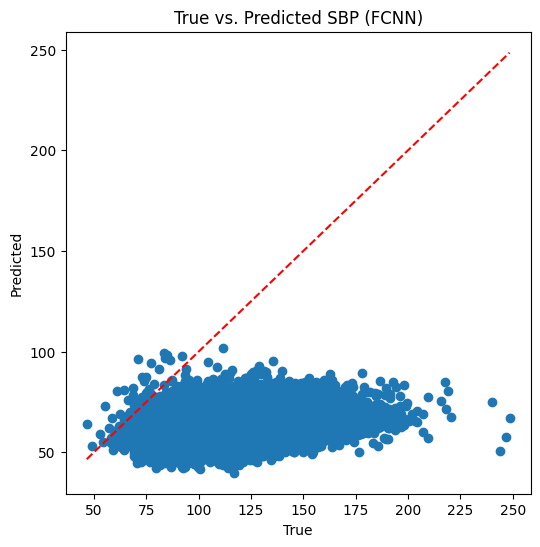

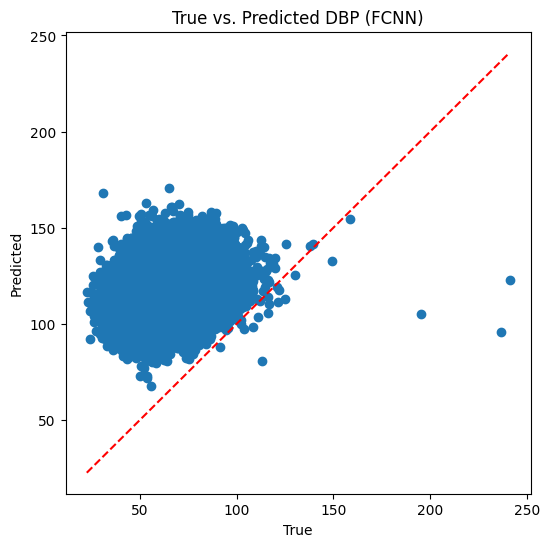

In [12]:
metrics = evaluate_model("FCNN", FCNN, train_loader, val_loader)
metrics_list.append(metrics)

In [13]:
metrics = evaluate_model("1D CNN", CNN1D, train_loader, val_loader)
metrics_list.append(metrics)

KeyboardInterrupt: 

In [ ]:
metrics = evaluate_model("RNN", lambda: RNN(model_type='RNN'), train_loader, val_loader)
metrics_list.append(metrics)

In [ ]:
metrics = evaluate_model("LSTM", lambda: RNN(model_type='LSTM'), train_loader, val_loader)
metrics_list.append(metrics)

In [ ]:
metrics = evaluate_model("GRU", lambda: RNN(model_type='GRU'), train_loader, val_loader)
metrics_list.append(metrics)

In [ ]:
metrics = evaluate_model("Transformer", Transformer, train_loader, val_loader)
metrics_list.append(metrics)

In [14]:
# model_list = [
#     ("FCNN", FCNN),
#     ("1D CNN", CNN1D),
#     ("RNN", lambda: RNN(model_type='RNN')),
#     ("LSTM", lambda: RNN(model_type='LSTM')),
#     ("GRU", lambda: RNN(model_type='GRU')),
#     ("Transformer", Transformer)
# ]
# metrics_list = []
# for name, model_class in model_list:
#   metrics = evaluate_model(name, model_class, train_loader, val_loader)
#   metrics_list.append(metrics)
final_table = pd.concat(metrics_list, axis=0).reset_index(drop=True)
print(final_table)

  Model Variable         ME        SDE        MAE         R2        Time  \
0  FCNN      SBP  52.566129  17.833429  52.566129  -7.674799  760.326125   
1  FCNN      DBP  53.632302  13.486640  53.632302 -19.991812  760.326125   

   Number of epochs  
0                17  
1                17  


#3. Generative Modeling

In [ ]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

# !cat /proc/meminfo

!pip install mat73
import mat73
import os, glob
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

ABP = mat73.loadmat("/content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat")['Subset']['Signals'][:,2,:].astype('float32')
ABP = mat73.loadmat("/content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat")['Subset']['Signals'][:,2,:].astype('float32')
ABP_test = mat73.loadmat("/content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat")['Subset']['Signals'][:,2,:].astype('float32')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(ABP.shape)
print(ABP.dtype)
print(ABP_test.shape)
print(ABP_test.dtype)

(51720, 1250)
float32
(51720, 1250)
float32


Explained variance ratio: [4.0023050e-01 3.7774928e-02 3.4669269e-02 ... 1.4636663e-12 1.4484975e-12
 1.4421612e-12]
Cumulative explained variance ratio: [0.4002305  0.43800542 0.4726747  ... 0.9999987  0.9999987  0.9999987 ]
Elbow point (best n_components): 99
Best cumulative_variance_ratio : 0.9806403


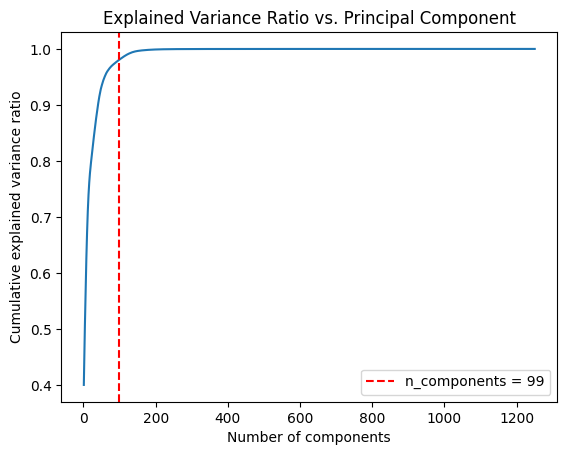

In [ ]:
# First, perform a Principle Component Analysis (PCA) to understand the dimensionality of the ABP signals.
# Perform an “elbow analysis” to determine the intrinsic linear dimension of the data.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


ABP_scaled = StandardScaler().fit_transform(ABP_test)
pca = PCA()
ABP_pca = pca.fit_transform(ABP_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

!pip install kneed
from kneed import KneeLocator
knee = KneeLocator(
    range(1,1251),
    cumulative_variance_ratio,
    curve='concave',
    direction='increasing'
)
print("Elbow point (best n_components):", knee.knee)
print("Best cumulative_variance_ratio :", knee.knee_y)

# Plot the explained variance ratio
plt.plot(range(1,1251), cumulative_variance_ratio)
plt.axvline(x=knee.knee, color='r', linestyle='--', label=f'n_components = {knee.knee}')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Explained Variance Ratio vs. Principal Component')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import gc, time

In [ ]:
n = int(len(ABP)*0.9)
ABP_train = ABP[:n]
ABP_val = ABP[n:]

print("Train samples: ",len(ABP_train))
print("Validation samples: ",len(ABP_val))

# normalization
mean = np.mean(ABP_train)
std = np.std(ABP_train)
ABP_train -= mean
ABP_train /= std
ABP_val -= mean
ABP_val /= std
ABP_test -= mean
ABP_test /= std

# wrap in PyTorch TensorDatasets and DataLoaders
ABP_train_loader = DataLoader(TensorDataset(torch.from_numpy(ABP_train.astype(np.float32))), batch_size=64, shuffle=True)
ABP_val_loader = DataLoader(TensorDataset(torch.from_numpy(ABP_val.astype(np.float32))), batch_size=64, shuffle=False)
ABP_test_loader = DataLoader(TensorDataset(torch.from_numpy(ABP_test.astype(np.float32))), batch_size=64, shuffle=False)

Train samples:  46548
Validation samples:  5172


In [ ]:
# train a fully connected or 1D convolutional autoencoder (AE) to minimize reconstruction loss (MSE between reconstructed and true ABP).

# fully connected autoencoder (AE)
class FCAutoencoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(1250, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim)
        )
        # Decoder (mirror)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1250)
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        z = self.encode(x)
        x_rec = self.decode(z)
        return x_rec

def evaluate_loop(model, val_loader, loss_fn = nn.MSELoss()):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for (X,) in val_loader:
            X = X.to(device)
            pred = model(X)
            val_loss += loss_fn(pred, X).item()
    val_loss /= len(val_loader)
    return val_loss

def train_model(model, train_loader, val_loader, epochs=300, lr=0.001, loss_fn = nn.MSELoss()):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # early stopping setting
    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0
    tol = 0.0001

    n_epochs = epochs
    start = time.time()
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for (X,) in train_loader:
            X = X.to(device)
            optimizer.zero_grad()
            pred = model(X)
            loss = loss_fn(pred, X)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        # validation
        val_loss = evaluate_loop(model, val_loader)

        # early stopping
        if best_val_loss - val_loss >= tol:
          best_val_loss = val_loss
          patience_counter = 0
          torch.save(model.state_dict(), "best_model.pt")
        else:
          patience_counter += 1
          if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pt")
          if patience_counter >= patience:
            n_epochs = epoch+1 - patience
            # print("Early stopping triggered!")
            break
    end = time.time()
    model.load_state_dict(torch.load("best_model.pt"))

    return model, end - start, n_epochs


In [ ]:
# perform an elbow analysis to choose a latent dimension.

latent_list = [2,4,8,16,32,64,128,256]
rec_errors = []
training_times = []
ABP_gen = {}

ABP_gen[1250] = {
    "latent_dim": 1250,
    "generated": torch.from_numpy(ABP_test[0]).float()
}

for ld in latent_list:
    print("Training AE with latent dim =", ld)
    model = FCAutoencoder(latent_dim=ld)
    trained_model, training_time, epochs = train_model(model, ABP_train_loader, ABP_val_loader)
    # compute test reconstruction MSE
    test_mse = evaluate_loop(trained_model, ABP_test_loader)
    rec_errors.append(test_mse)
    training_times.append(training_time)
    print(f"latent {ld} val MSE = {test_mse:.6e}, time {training_time:.1f}s")

    #generate one reconstructed ABP signal
    trained_model.eval()
    with torch.no_grad():
        x0 = torch.from_numpy(ABP_test[0]).float().to(device)
        x0 = x0.unsqueeze(0)

        x_rec = trained_model(x0).cpu().squeeze(0)  # remove batch dim
        x_rec *= std
        x_rec += mean

        ABP_gen[ld] = {
            "latent_dim": ld,
            "generated": x_rec
        }

    # free memory
    del trained_model
    gc.collect()
    torch.cuda.empty_cache()

knee = KneeLocator(latent_list, rec_errors, curve='convex', direction='decreasing')
print("Knee (latent dim) suggested:", knee.knee)

# plot elbow: latent_dim vs reconstruction error
# plt.figure(figsize=(6,4))
plt.plot(latent_list, rec_errors, marker='o')
plt.axvline(x=knee.knee, color='r', linestyle='--', label=f'latent_dim = {knee.knee}')
plt.xlabel("Latent dimension")
plt.ylabel("Validation reconstruction MSE")
plt.title("AE elbow (reconstruction vs latent dim)")
plt.show()

Training AE with latent dim = 2
latent 2 val MSE = 4.414769e-01, time 1208.7s
Training AE with latent dim = 4


AttributeError: 'float' object has no attribute 'time'

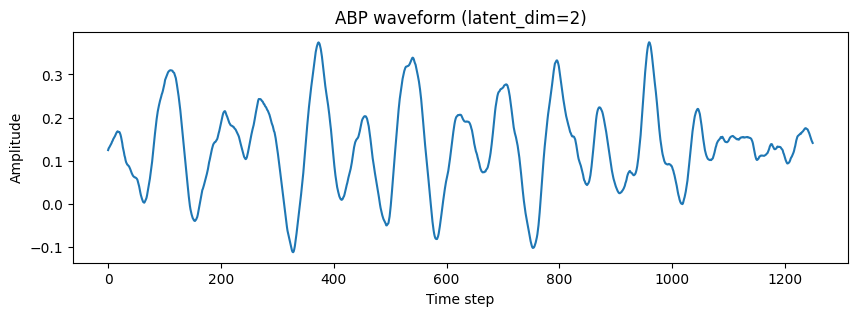

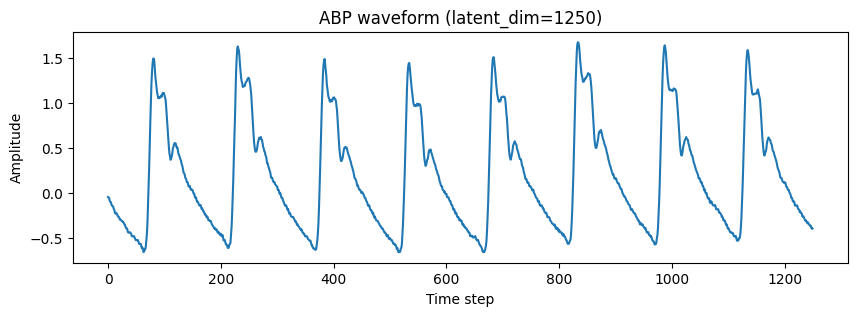

In [ ]:
# Use the decoder to generate some new ABP signals. Include plots with examples of both data and generated signals

ABP_gen_sorted = dict(sorted(ABP_gen.items(), key=lambda x: x[0]))

for ld, item in ABP_gen_sorted.items():
    signal = item["generated"].numpy()
    plt.figure(figsize=(10,3))
    plt.plot(signal)
    plt.title(f"ABP waveform (latent_dim={ld})")
    plt.xlabel("Time step")
    plt.ylabel("Amplitude")
    plt.show()